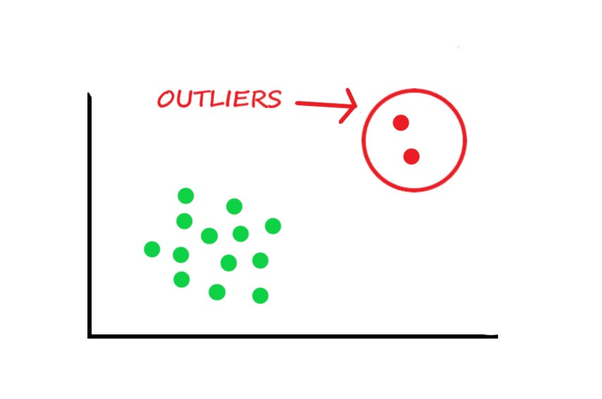
### What is the Impact of Outliers?
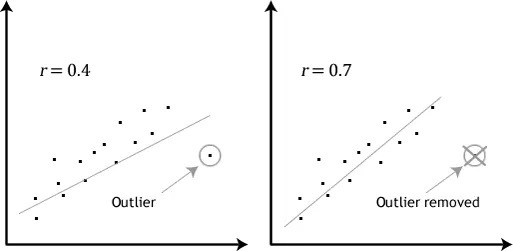

# What is an outlier?

When exploring data, the outliers are the extreme values within the dataset. That means the outlier data points vary greatly from the expected values—either being much larger or significantly smaller. 

# How do you find outliers in your dataset?

#### 1. Use data visualization techniques to inspect the data’s distribution and verify the presence of outliers. 

#### 2. Use a statistical method to calculate the outlier data points.

# How do you visualize outliers?

**These are a few of the most popular visualization methods for finding outliers in data:**

- Histogram
- Box plot
- Scatter plot

# 1. Histogram

In [8]:
import seaborn as sns
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic', 'anagrams', 'anagrams', 'anscombe', 'anscombe', 'attention', 'attention', 'brain_networks', 'brain_networks', 'car_crashes', 'car_crashes', 'diamonds', 'diamonds', 'dots', 'dots', 'dowjones', 'dowjones', 'exercise', 'exercise', 'flights', 'flights', 'fmri', 'fmri', 'geyser', 'geyser', 'glue', 'glue', 'healthexp', 'healthexp', 'iris', 'iris', 'mpg', 'mpg', 'penguins', 'penguins', 'planets', 'planets', 'seaice', 'seaice', 'taxis', 'taxis', 'tips', 'tips', 'titanic', 'titanic', 'anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [9]:
sns.__version__

'0.12.2'

In [10]:
taxis = sns.load_dataset("taxis")
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [26]:
taxis.shape

(6433, 14)

C:\Users\kk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


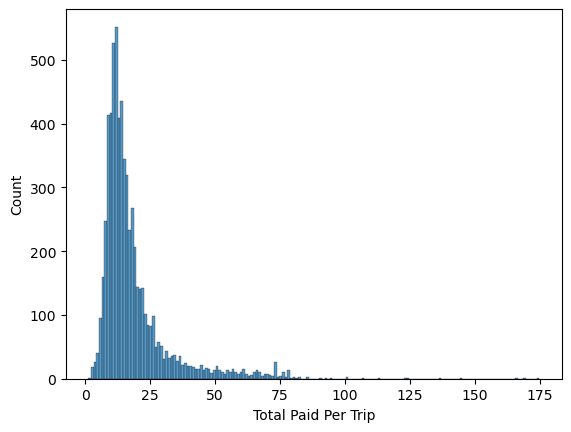

In [11]:
import matplotlib.pyplot as plt

sns.histplot(x="total", data=taxis)
plt.xlabel("Total Paid Per Trip")
plt.show()

# 2. Box Plot

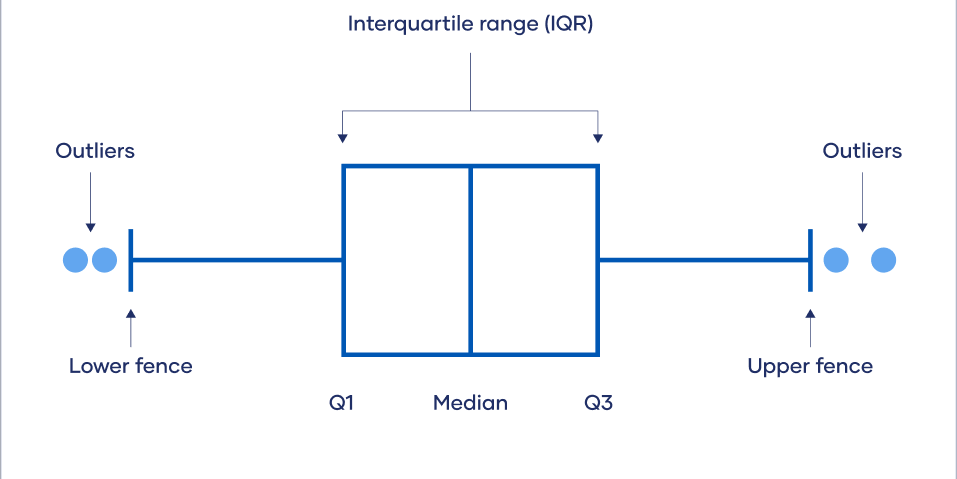

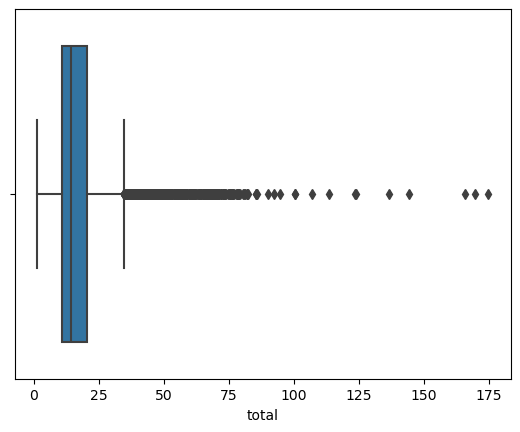

In [12]:
sns.boxplot(x='total', data=taxis)
plt.show()

# 3. Z-Score

A Z-Score is a statistical measure that indicates how many standard deviations a specific data point is above or below the mean of the dataset.

## Formula for Z-Score

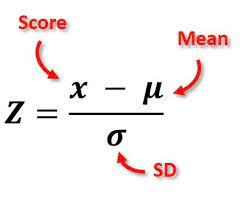

In [21]:
total_mean = taxis['total'].mean()
print("-"*15)
print(total_mean)
print("-"*15)
total_sd = taxis['total'].std()
print(total_sd)
print("-"*15)
# calculate z-score for each data point and compute its absolute value
abs_z_scores = abs((taxis['total'] - total_mean)/total_sd)

print(abs_z_scores.head(10))
print("-"*15)

# select outliers using the threshold 3 sigma

outliers = taxis[abs_z_scores>3]
print(outliers.head(10))

---------------
18.517794186227267
---------------
13.81557004106683
---------------
0    0.403009
1    0.667203
2    0.315426
3    1.334162
4    0.370437
5    0.402285
6    0.020427
7    0.486248
8    0.056618
9    0.377675
Name: total, dtype: float64
---------------
                 pickup             dropoff  passengers  distance  fare  \
42  2019-03-30 23:59:14 2019-03-30 23:59:17           1      0.00  80.0   
56  2019-03-05 17:57:00 2019-03-05 18:45:25           2     19.59  52.0   
162 2019-03-06 17:36:48 2019-03-06 18:43:39           2     17.10  52.0   
188 2019-03-26 15:06:47 2019-03-26 15:59:52           1     18.41  52.0   
225 2019-03-22 15:36:34 2019-03-22 16:34:48           2     12.07  48.5   
250 2019-03-21 10:07:48 2019-03-21 10:52:02           2     16.74  52.0   
283 2019-03-22 11:55:00 2019-03-22 12:36:56           2     16.60  52.0   
302 2019-03-20 17:22:33 2019-03-20 18:07:19           1     17.01  52.0   
308 2019-03-18 12:54:42 2019-03-18 13:32:35           5 

In [28]:
# Second method

from scipy.stats import zscore

# calculate z-score for each data point and compute its absolute value
z_scores = zscore(taxis['total'])

outliers_df = taxis[(z_scores<-3) | 
                                   (z_scores>3)]
outliers_df[:10]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.00,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
56,2019-03-05 17:57:00,2019-03-05 18:45:25,2,19.59,52.0,0.00,5.76,65.56,yellow,credit card,JFK Airport,Upper East Side North,Queens,Manhattan
162,2019-03-06 17:36:48,2019-03-06 18:43:39,2,17.10,52.0,13.10,5.76,78.66,yellow,credit card,Midtown South,JFK Airport,Manhattan,Queens
188,2019-03-26 15:06:47,2019-03-26 15:59:52,1,18.41,52.0,0.02,5.76,61.08,yellow,credit card,JFK Airport,Midtown Center,Queens,Manhattan
225,2019-03-22 15:36:34,2019-03-22 16:34:48,2,12.07,48.5,11.51,5.76,69.07,yellow,credit card,Manhattan Valley,Boerum Hill,Manhattan,Brooklyn
250,2019-03-21 10:07:48,2019-03-21 10:52:02,2,16.74,52.0,15.26,5.76,76.32,yellow,credit card,East Chelsea,JFK Airport,Manhattan,Queens
283,2019-03-22 11:55:00,2019-03-22 12:36:56,2,16.60,52.0,6.00,5.76,67.06,yellow,credit card,Midtown Center,JFK Airport,Manhattan,Queens
302,2019-03-20 17:22:33,2019-03-20 18:07:19,1,17.01,52.0,0.00,5.76,65.56,yellow,cash,JFK Airport,Midtown East,Queens,Manhattan
308,2019-03-18 12:54:42,2019-03-18 13:32:35,5,18.76,52.0,11.71,5.76,70.27,yellow,credit card,Central Harlem,JFK Airport,Manhattan,Queens
314,2019-03-24 06:21:12,2019-03-24 06:46:32,1,18.99,50.5,10.26,0.00,61.56,yellow,credit card,JFK Airport,Brooklyn Heights,Queens,Brooklyn


In [29]:
len(outliers_df)

185

In [ ]:
# Obtain number of outliers
print(f'Number of outliers: {len(outliers)}')

In [18]:
# Obtain number of outliers
print(f'Number of outliers: {len(outliers)}')

Number of outliers: 185


#### Note: The choice of 3 as the threshold comes from the empirical rule, which states that data within 3 times the standard deviation from the mean represent 99.7% of the data in the distribution.

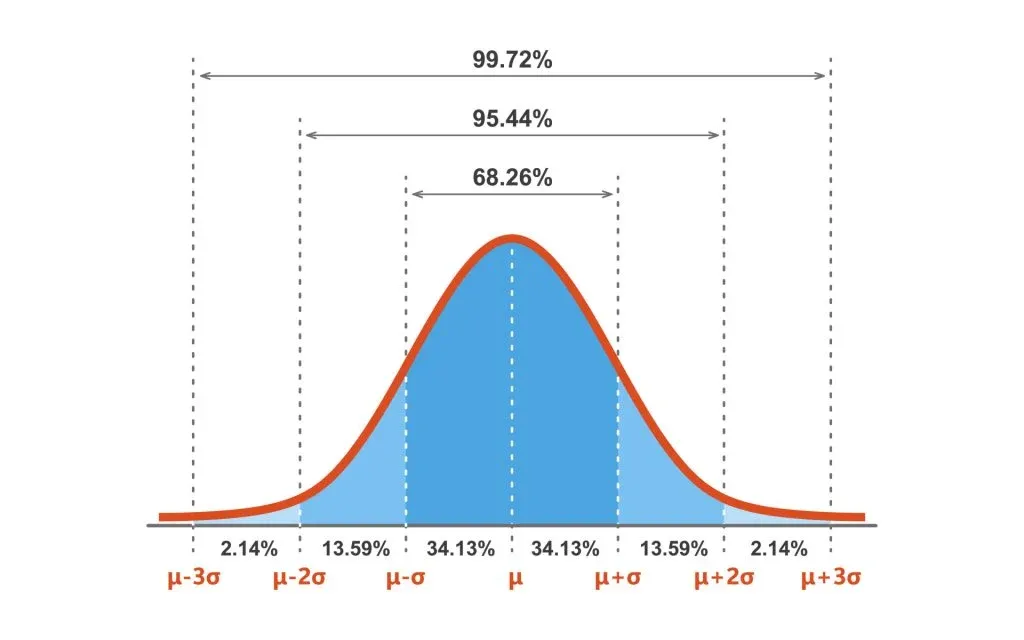

> ***In this case, we found 185 outliers using the z-score method, but in reality, we can’t entirely rely on this result. Why? Because the empirical rule, and therefore the z-score method, is only appropriate for normal distributions.*** 

In [39]:
import pandas as pd

titanic = pd.read_csv('titanic.csv')
titanic[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [40]:
# Dropping NaN's 

titanic.dropna(inplace=True)

In [43]:
from scipy.stats import zscore

# calculating z-score 

z_scores_tit = zscore(titanic['Age'])

# selecting outliers
outliers_df1 = titanic[(z_scores_tit<-3) | 
                                   (z_scores_tit>3)]
outliers_df1[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [45]:
titanic.Age.describe()

count    183.000000
mean      35.674426
std       15.643866
min        0.920000
25%       24.000000
50%       36.000000
75%       47.500000
max       80.000000
Name: Age, dtype: float64

<Axes: xlabel='Age'>

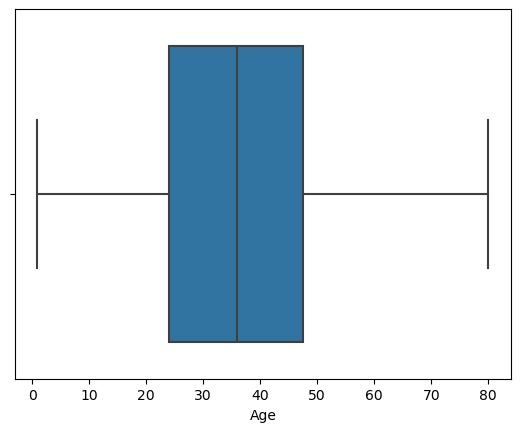

In [47]:
sns.boxplot(x='Age', data=titanic)

# 5. Interquartile Range (IQR)

In [2]:
import pandas as pd

df = pd.read_csv("diabetes.csv")
df[:3]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


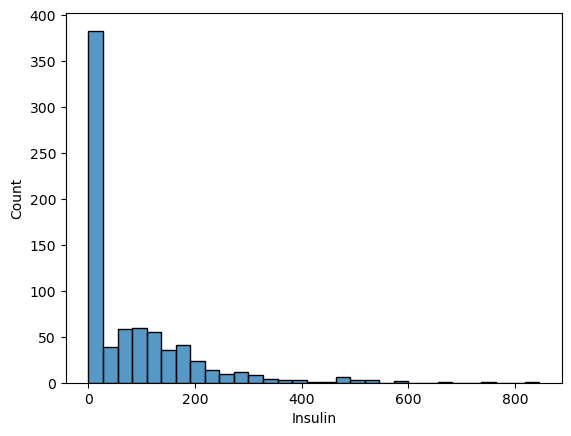

In [11]:
sns.histplot(x='Insulin', data=df)
plt.show()

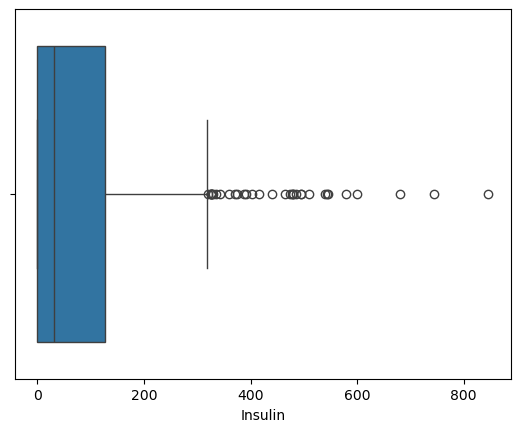

In [17]:
sns.boxplot(x='Insulin', data=df)
plt.show()

## Insulin is skewed, so I'll use IQR method to find Outliers

In [22]:
# IQR = Q3-Q1
# lower_fence = Q1-1.5*IQR
# upper_fence = Q3+1.5*IQR

Q3 = df['Insulin'].quantile(0.75)
print("Q3",Q3)
Q1 = df['Insulin'].quantile(0.25)
print("Q1",Q1)
IQR = Q3-Q1
print(IQR)

lower_fence = Q1-1.5*IQR
upper_fence = Q3+1.5*IQR
print("LowerFence", lower_fence)
print("UpperFence", upper_fence)

# Selecting the outliers
outlier_df = df[(df['Insulin']<lower_fence) |
                (df['Insulin']>upper_fence)]
outlier_df

Q3 127.25
Q1 0.0
127.25
LowerFence -190.875
UpperFence 318.125


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
54,7,150,66,42,342,34.7,0.718,42,0
111,8,155,62,26,495,34.0,0.543,46,1
139,5,105,72,29,325,36.9,0.159,28,0
153,1,153,82,42,485,40.6,0.687,23,0
186,8,181,68,36,495,30.1,0.615,60,1
220,0,177,60,29,478,34.6,1.072,21,1
228,4,197,70,39,744,36.7,2.329,31,0
231,6,134,80,37,370,46.2,0.238,46,1


In [23]:
# Obtain number of outliers
len(outlier_df)

34

# How to handle outliers

**Here are three techniques we can use to handle outliers:**

- Drop the outliers
- Cap the outliers
- Replace outliers using imputation as if they were missing values

# 1. Drop the outliers

In [26]:
df.shape

(768, 9)

In [27]:
768-34

734

In [32]:
# Removing Outliers with IQR
print("Length of Original Dataframe", len(df))

df_without_outliers = df[~(df['Insulin']>upper_fence)]
print(df_without_outliers)

print("Length of Non-Outliered Dataframe", len(df_without_outliers))

Length of Original Dataframe 768
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0              6      148             72             35        0  33.6                     0.627   50        1
1              1       85             66             29        0  26.6                     0.351   31        0
2              8      183             64              0        0  23.3                     0.672   32        1
3              1       89             66             23       94  28.1                     0.167   21        0
4              0      137             40             35      168  43.1                     2.288   33        1
..           ...      ...            ...            ...      ...   ...                       ...  ...      ...
763           10      101             76             48      180  32.9                     0.171   63        0
764            2      122             70             27        0  36.8         

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 2. Cap the outliers

In [6]:
# IQR = Q3-Q1
# lower_fence = Q1-1.5*IQR
# upper_fence = Q3+1.5*IQR

Q3 = df['Insulin'].quantile(0.75)
Q1 = df['Insulin'].quantile(0.25)
IQR = Q3-Q1

lower_fence = Q1-1.5*IQR
upper_fence = Q3+1.5*IQR
print("LowerFence", lower_fence)
print("UpperFence", upper_fence)

# CAPPING OUTLIERS
import numpy as np

df['Insulin_capped'] = np.where(df['Insulin']>upper_fence,upper_fence,
                               np.where(df['Insulin']<lower_fence,lower_fence,
                               df['Insulin']))
df['Insulin_capped']

LowerFence -190.875
UpperFence 318.125


0        0.0
1        0.0
2        0.0
3       94.0
4      168.0
       ...  
763    180.0
764      0.0
765    112.0
766      0.0
767      0.0
Name: Insulin_capped, Length: 768, dtype: float64

**We can use .describe() to verify the min and max values have been capped as expected:**

In [8]:
df['Insulin'].describe().round(2)

count    768.00
mean      79.80
std      115.24
min        0.00
25%        0.00
50%       30.50
75%      127.25
max      846.00
Name: Insulin, dtype: float64